## Import Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dense, Dropout
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [3]:
path = r'/Users/jmiel/JENNY_STUFF/MY_DOCS/CareerFoundry/ClimateWins/Data Sets/Multi-class Weather Dataset'

In [4]:
#download the weather images and put them in a directory
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [5]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [6]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [7]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 18, #<----FILL THIS IN!
    batch_size = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = (test_generator.n // test_generator.batch_size)-1,
)

C:\Users\jmiel\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/18
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 386ms/step - accuracy: 0.3983 - loss: 0.1724 - val_accuracy: 0.7135 - val_loss: 0.1126
Epoch 2/18
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 292ms/step - accuracy: 0.7041 - loss: 0.0908 - val_accuracy: 0.7188 - val_loss: 0.0952
Epoch 3/18


C:\Users\jmiel\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 353ms/step - accuracy: 0.7917 - loss: 0.0812 - val_accuracy: 0.7969 - val_loss: 0.0731
Epoch 4/18
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 306ms/step - accuracy: 0.7555 - loss: 0.0789 - val_accuracy: 0.6875 - val_loss: 0.1026
Epoch 5/18
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 360ms/step - accuracy: 0.8348 - loss: 0.0650 - val_accuracy: 0.8542 - val_loss: 0.0555
Epoch 6/18
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 306ms/step - accuracy: 0.8470 - loss: 0.0545 - val_accuracy: 0.6562 - val_loss: 0.1222
Epoch 7/18
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 343ms/step - accuracy: 0.8464 - loss: 0.0550 - val_accuracy: 0.8073 - val_loss: 0.0691
Epoch 8/18
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 290ms/step - accuracy: 0.8312 - loss: 0.0590 - val_accuracy: 0.7812 - val_loss: 0.0917
Epoch 9/18
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 348ms/step - accuracy: 0.9020 - loss: 0.0406 - val_accuracy: 0.8646 - val_loss: 0.0490
Epoch 10/18
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 296ms/step - accuracy: 0.8947 - loss: 0.0417 - val_accuracy: 0.6875 -

In [16]:
results = pd.DataFrame(model.history.history)

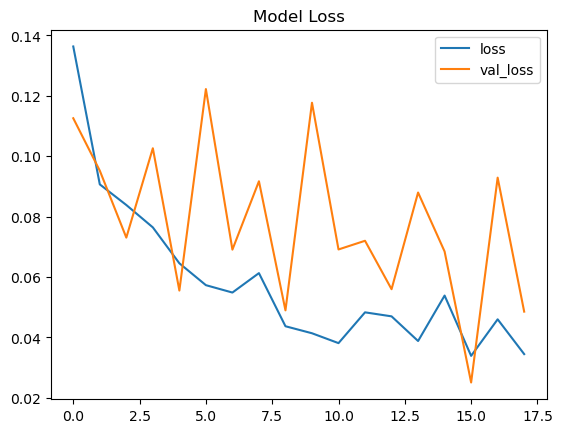

In [18]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

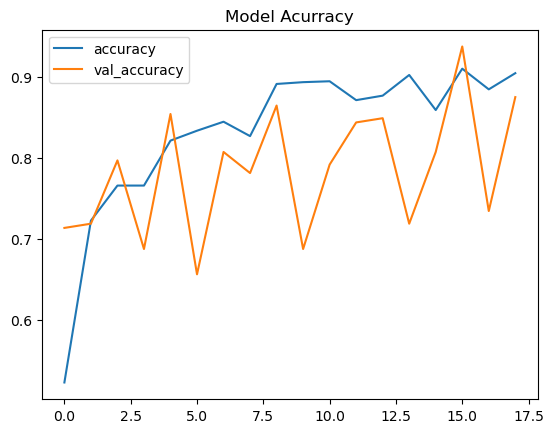

In [20]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [22]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.9045504927635193, Val_Accuracy: 0.875
Loss: 0.034488286823034286, Val_Loss: 0.04854939877986908


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step


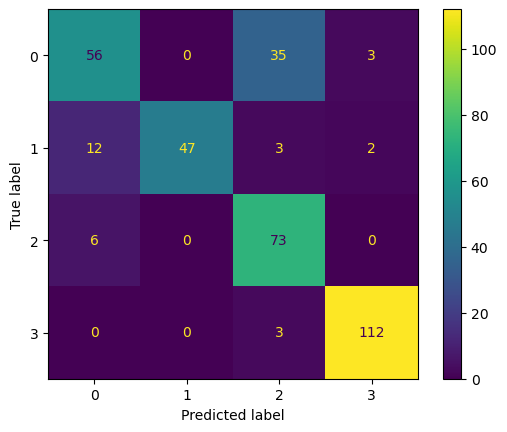

In [24]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [26]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


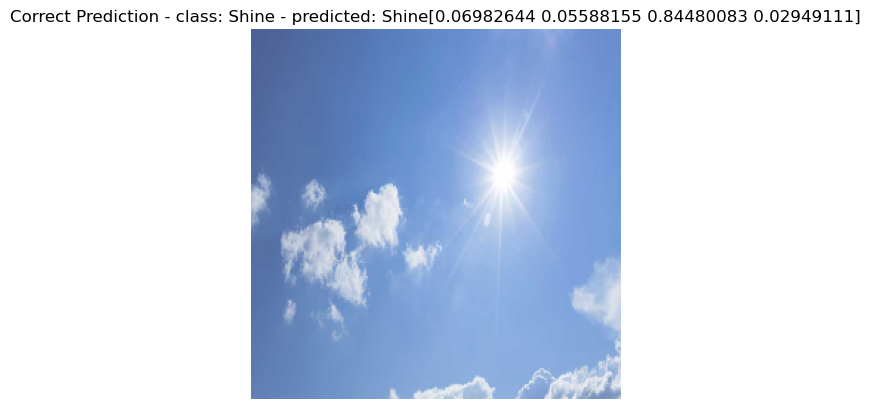

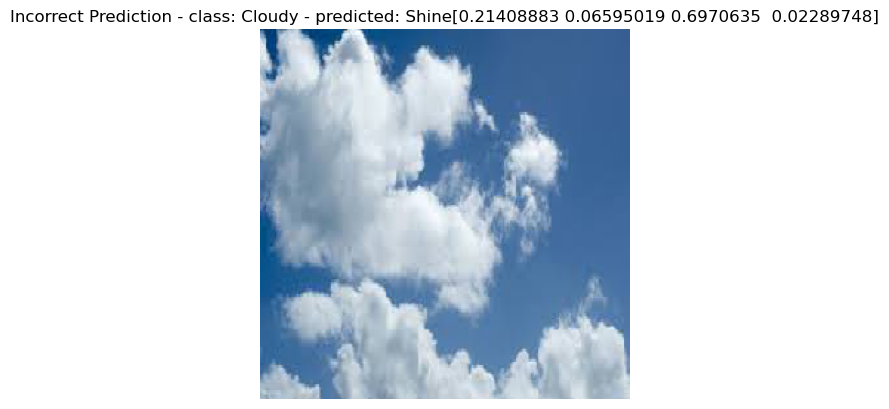

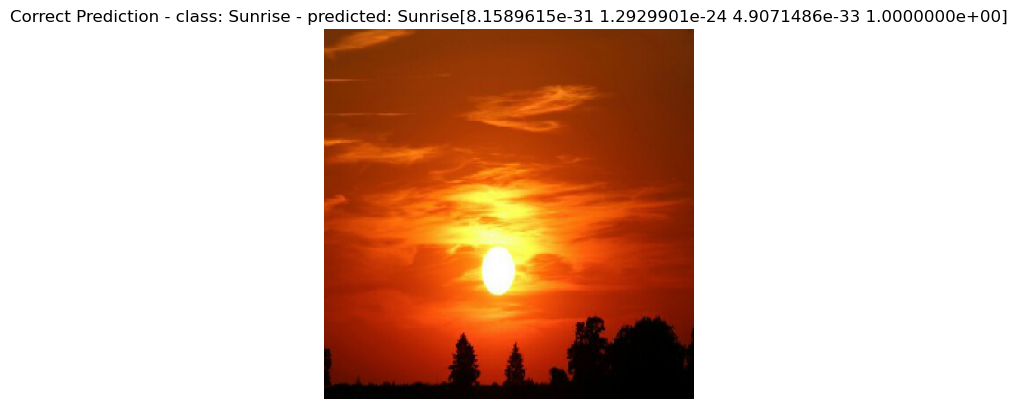

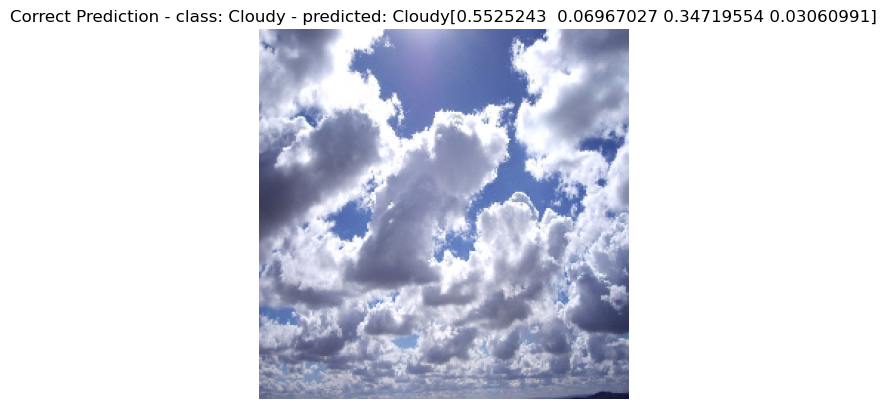

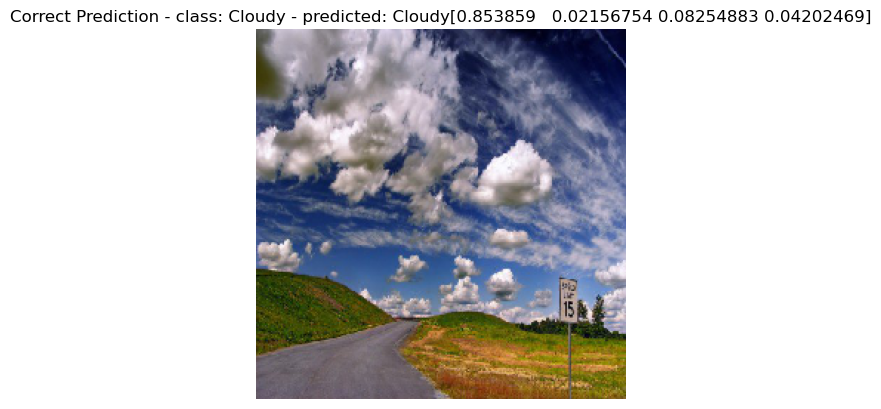

In [28]:
predict_one(model, 5) #<--you can show multiple pictures with this command. Just fill in the number you want to see.